In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv("AIML Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.shape

(6362620, 11)

In [10]:
df["isFraud"].value_counts()[1]/df.shape[0] * 100 

0.12908204481801522

<Axes: xlabel='type'>

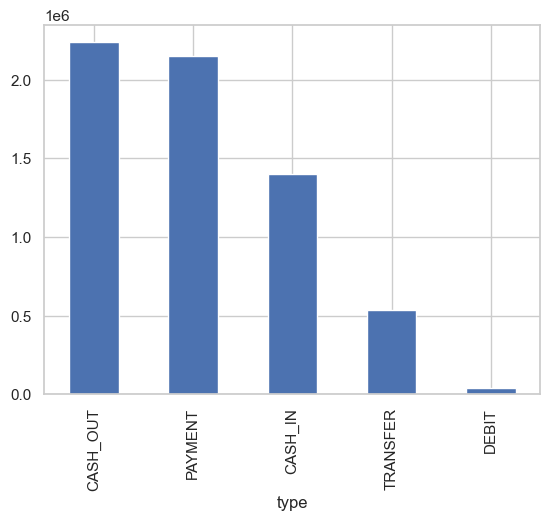

In [11]:
df['type'].value_counts().plot(kind='bar')

In [12]:
fraud_by_type=df.groupby('type')["isFraud"].mean().sort_values(ascending=False)

<Axes: title={'center': 'Fraud rate by type'}, xlabel='type'>

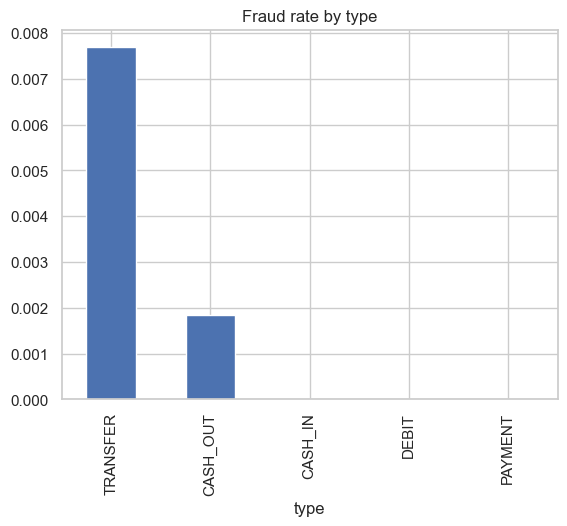

In [13]:
fraud_by_type.plot(kind='bar',title="Fraud rate by type")

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

In [15]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


<Axes: xlabel='amount', ylabel='Count'>

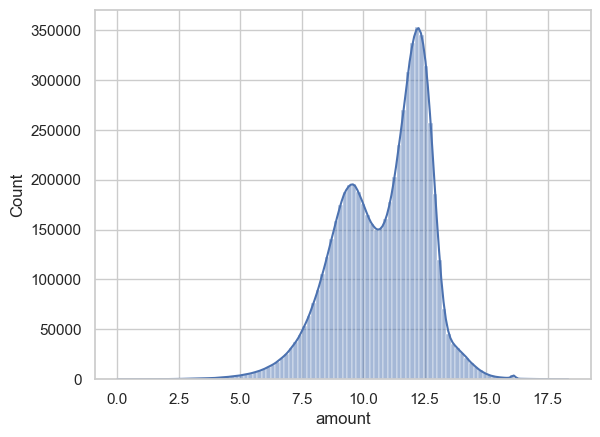

In [16]:
sns.histplot(np.log1p(df["amount"]),kde=True,bins=100)

<Axes: xlabel='isFraud', ylabel='amount'>

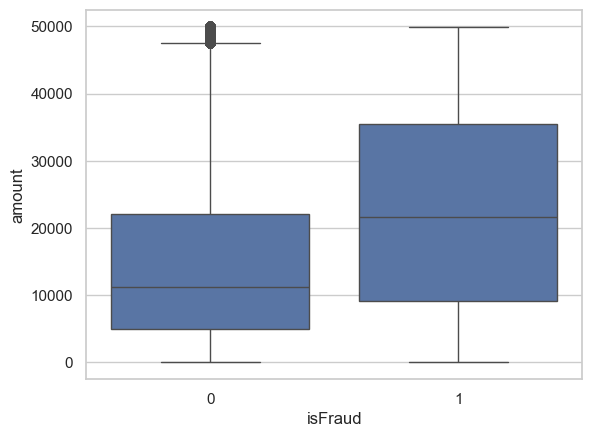

In [17]:
sns.boxplot(data=df[df["amount"] < 50000 ],x="isFraud",y="amount")

In [18]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [19]:
df["balanceDiffOrg"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["oldbalanceDest"]-df["newbalanceDest"]

In [20]:
(df["balanceDiffOrg"] < 0).sum()

1399253

In [21]:
(df["balanceDiffDest"] < 0).sum()

2806464

In [22]:
Fraud_per_step=df[df["isFraud"] == 1]["step"].value_counts().sort_index()

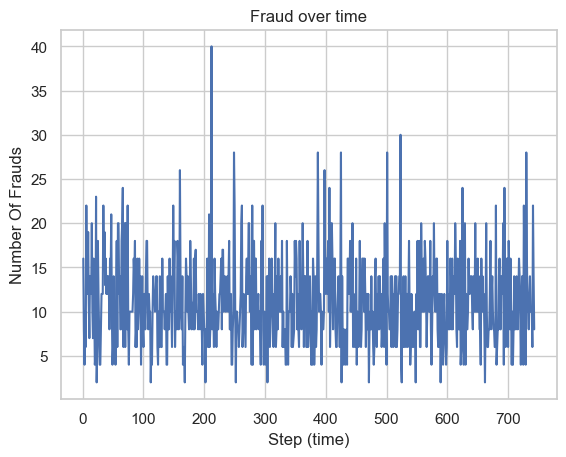

In [23]:
plt.plot(Fraud_per_step.index,Fraud_per_step.values,label="Fraud per step")
plt.xlabel("Step (time)")
plt.ylabel("Number Of Frauds")
plt.title("Fraud over time")
plt.grid(True)

In [24]:
df.drop(columns="step",inplace=True)

In [25]:
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,21182.00
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,-339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [26]:
Top_senders=df['nameOrig'].value_counts().head(10)

In [27]:
Top_receivers=df['nameDest'].value_counts().head(10)

In [28]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [29]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [30]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

<Axes: xlabel='type', ylabel='count'>

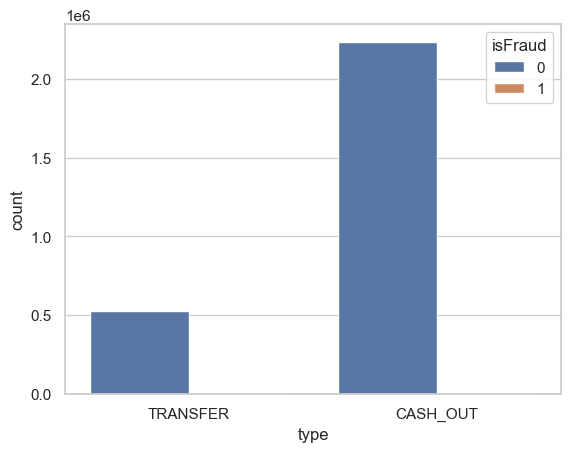

In [31]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")

In [32]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].corr()

In [33]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000


<Axes: >

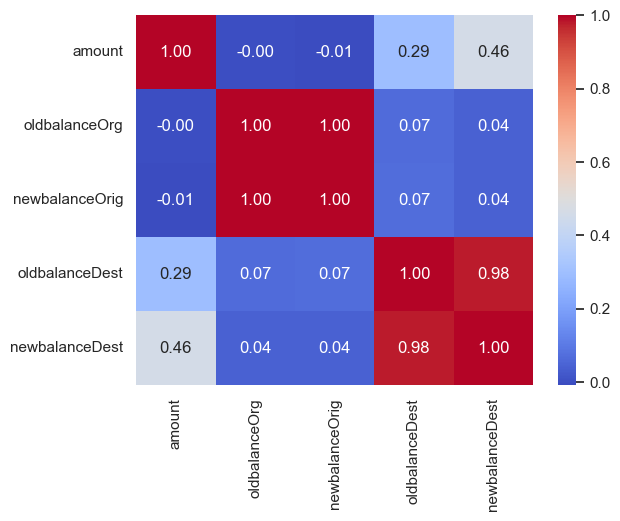

In [34]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")

In [35]:
zero_after_transfer=df[
(df["oldbalanceOrg"] > 0) &
(df["newbalanceOrig"] == 0) &
(df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [37]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [38]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [39]:
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,-339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [40]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [41]:
X=df_model.drop("isFraud",axis=1)
y=df_model["isFraud"]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [43]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],remainder="drop")

In [44]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
     ])

In [45]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [46]:
y_pred=pipeline.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [48]:
confusion_matrix(y_test,y_pred)

array([[1806009,  100313],
       [    150,    2314]], dtype=int64)

In [49]:
pipeline1=Pipeline([
    ("prep",preprocessor),
    ('smote', SMOTE(random_state=42)),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [50]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [51]:
y_pred1=pipeline1.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [53]:
confusion_matrix(y_test,y_pred1)

array([[1806124,  100198],
       [    112,    2352]], dtype=int64)

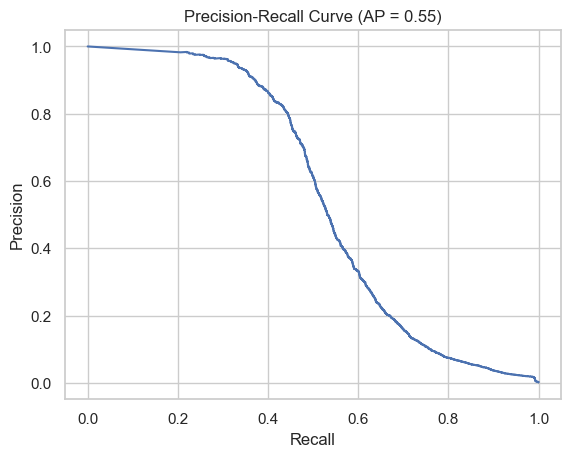

In [54]:
# Example: using your trained model
y_scores = pipeline1.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {ap:.2f})')
plt.grid(True)
plt.show()


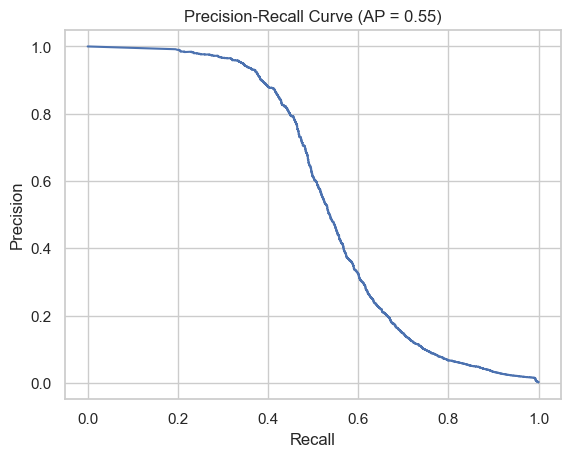

In [55]:
# Example: using your trained model
y_scores = pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {ap:.2f})')
plt.grid(True)
plt.show()

In [56]:
import joblib
joblib.dump(pipeline1,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']